## Connected Component Analysis

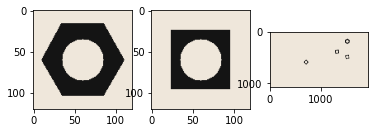

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

### Otsu's thresholding

In [15]:
hexnut_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_gray=cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_gray=cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

th1,hext = cv.threshold(hexnut_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
th2,squaret = cv.threshold(squarenut_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
th3,belt = cv.threshold(conveyor_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

print('Threshold value for hexnut template:',th1)
print('Threshold value for squarenut template:',th2)
print('Threshold value for conveyor belt:',th3)

Threshold value for hexnut template: 20.0
Threshold value for squarenut template: 20.0
Threshold value for conveyor belt: 20.0


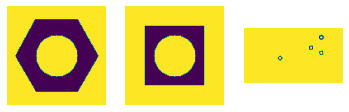

In [16]:
fig,ax=plt.subplots(1,3)
ax[0].imshow(hext)
ax[0].axis('off')
ax[1].imshow(squaret)
ax[1].axis('off')
ax[2].imshow(belt)
ax[2].axis('off')
plt.show()

### Morphological closing

In [17]:
kernel = np.ones((3,3),np.uint8)
hex_closing = cv.morphologyEx(hext, cv.MORPH_CLOSE, kernel)
square_closing = cv.morphologyEx(squaret, cv.MORPH_CLOSE, kernel)
belt_closing = cv.morphologyEx(belt, cv.MORPH_CLOSE, kernel)

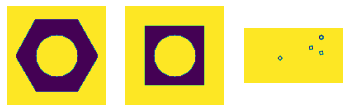

In [18]:
fig,ax=plt.subplots(1,3)
ax[0].imshow(hex_closing)
ax[0].axis('off')
ax[1].imshow(square_closing)
ax[1].axis('off')
ax[2].imshow(belt_closing)
ax[2].axis('off')
plt.show()

### Connected components analysis for Hexnut template

In [24]:
connectivity = 4
hex_num_labels,hex_labels,hex_stat,hex_cent = cv.connectedComponentsWithStats(hext, connectivity, cv.CV_32S)
print('There are {} connected components in Hexnut template.'.format(hex_num_labels))
print('Statistics:')
print(hex_stat)
print()
print('Centroids:')
print(hex_cent)

There are 3 connected components in Hexnut template.
Statistics:
[[  10   16  101   88 4724]
 [   0    0  120  120 7715]
 [  35   35   51   51 1961]]

Centroids:
[[59.83361558 59.22290432]
 [59.16863253 59.54257939]
 [60.         60.        ]]


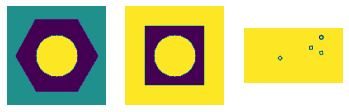

In [30]:
fig,ax=plt.subplots(1,3)
ax[0].imshow(hex_labels)
ax[0].axis('off')
ax[1].imshow(square_closing)
ax[1].axis('off')
ax[2].imshow(belt_closing)
ax[2].axis('off')
plt.show()